<a href="https://colab.research.google.com/github/itsmeharshit554/Image_classifcation_cnn/blob/main/Final_tomato2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run This

import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
# Run This
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
# Run This
len(gpus)

1

In [ ]:
# Run This
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Run This
data_path ="/content/drive/MyDrive/training_data"
os.listdir(data_path)

['Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold']

In [ ]:
# Run This
img_ext=["jpeg","jpg","bmp","png"]
# image extentions list

In [ ]:
# DONT RUN IT!!!
# ---------------------
# Remove corrupted images from dataset
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}")

In [ ]:
# Run This
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
# Run This
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Run This
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/training_data",image_size=(228,228))

Found 15600 files belonging to 10 classes.


In [ ]:
# Run This
data_iterator = data.as_numpy_iterator()

In [ ]:
# Run This
batch = data_iterator.next()
batch

(array([[[[ 84.72099 ,  76.72099 ,  87.72099 ],
          [115.729225, 107.729225, 118.729225],
          [115.16382 , 107.16382 , 118.16382 ],
          ...,
          [120.80391 , 110.80391 , 121.80391 ],
          [125.27714 , 115.27714 , 126.27714 ],
          [121.23115 , 111.23115 , 122.23115 ]],
 
         [[154.92522 , 146.92522 , 157.92522 ],
          [127.81648 , 119.81648 , 130.81648 ],
          [143.6932  , 135.6932  , 146.6932  ],
          ...,
          [101.56356 ,  91.56356 , 102.56356 ],
          [135.46222 , 125.46222 , 136.46222 ],
          [103.06523 ,  93.06523 , 104.06523 ]],
 
         [[149.38573 , 141.38573 , 152.38573 ],
          [146.90027 , 138.90028 , 149.90027 ],
          [132.0657  , 124.06571 , 135.0657  ],
          ...,
          [ 97.7872  ,  87.7872  ,  98.7872  ],
          [128.15672 , 118.15672 , 129.15672 ],
          [146.33806 , 136.33806 , 147.33806 ]],
 
         ...,
 
         [[167.04587 , 163.04587 , 177.04587 ],
          [141.226

In [ ]:
# Run This
len(batch)
# will print the groups in which dataset is classified

2

In [ ]:
# Run This
batch[1]

array([9, 0, 4, 3, 2, 8, 9, 3, 9, 6, 2, 3, 6, 4, 7, 6, 3, 9, 1, 3, 6, 7,
       2, 1, 2, 1, 6, 7, 9, 6, 9, 2], dtype=int32)

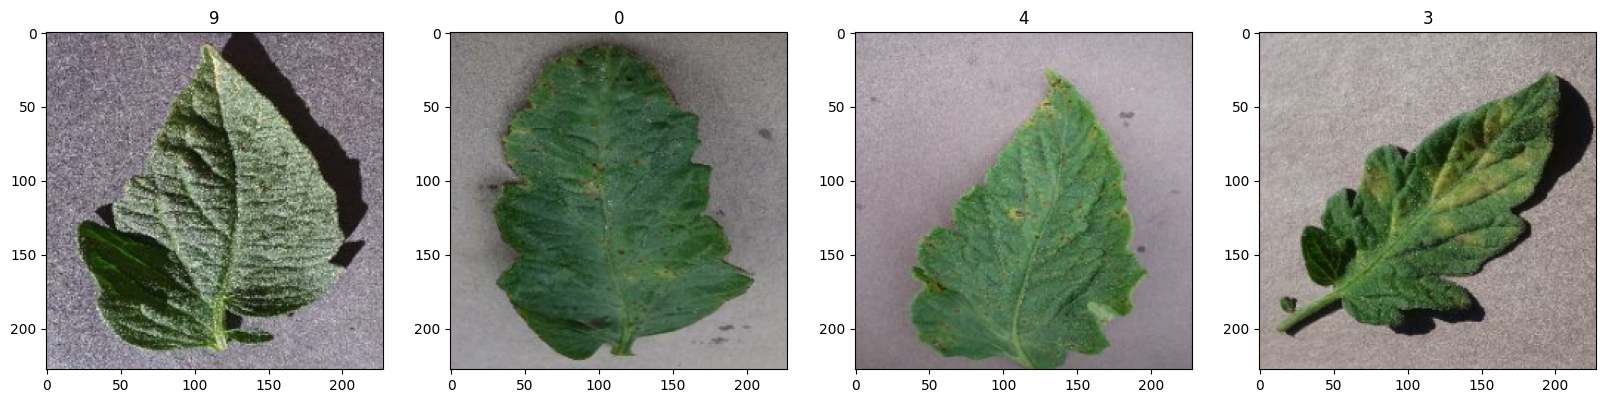

In [ ]:
# Run This
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Run This
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator()


In [ ]:
# Run This
scaled_iterator1=scaled_iterator.next()
scaled_iterator1


(array([[[[0.59933317, 0.5601175 , 0.55227435],
          [0.47061446, 0.43139878, 0.42355564],
          [0.48355693, 0.44434124, 0.4364981 ],
          ...,
          [0.65229636, 0.6209238 , 0.6091591 ],
          [0.6400403 , 0.60866773, 0.596903  ],
          [0.6238683 , 0.59249574, 0.58073103]],
 
         [[0.50260353, 0.46338782, 0.45554468],
          [0.49087772, 0.45166203, 0.4438189 ],
          [0.52887046, 0.48965472, 0.48181158],
          ...,
          [0.6596726 , 0.6283001 , 0.61653537],
          [0.66745156, 0.636079  , 0.6243143 ],
          [0.66871166, 0.6373391 , 0.6255744 ]],
 
         [[0.55931324, 0.52009755, 0.5122544 ],
          [0.52276087, 0.48354515, 0.47570202],
          [0.49550238, 0.4562867 , 0.44844356],
          ...,
          [0.6834619 , 0.65208936, 0.64032465],
          [0.65878534, 0.6274128 , 0.6156481 ],
          [0.63589424, 0.6045217 , 0.592757  ]],
 
         ...,
 
         [[0.57507235, 0.55154294, 0.5593861 ],
          [0.60957

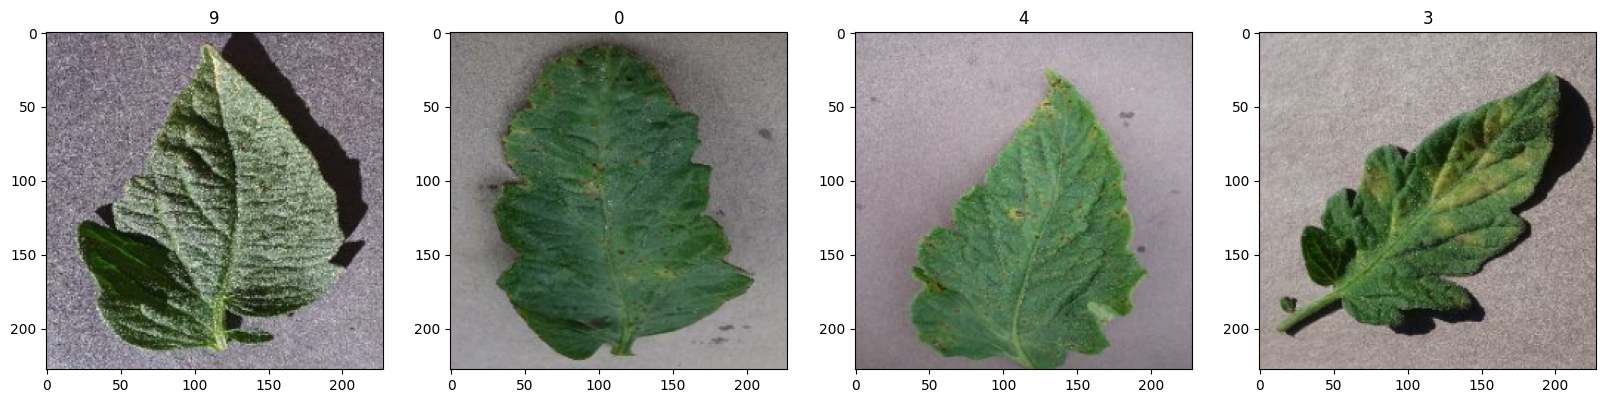

In [ ]:
# Run This
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Run This

# Split data into train, validation, and test sets
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [ ]:
# Run This

# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1)
'''
train_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
val_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
test_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")
'''

'\ntrain_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\nval_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\ntest_set = train_datagen.flow_from_directory(data_path, target_size=(228, 228), batch_size=32, class_mode="sparse")\n'

In [ ]:
# Run This

# Split data into train, validation, and test sets
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

train_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training')

val_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation')

test_set = train_datagen.flow_from_directory(
    data_path,
    target_size=(228, 228),
    batch_size=batch_size,
    class_mode="sparse")
    
print("Number of training samples:", train_set.n)
print("Number of validation samples:", val_set.n)
print("Number of testing samples:", test_set.n)


Found 12482 images belonging to 10 classes.
Found 3118 images belonging to 10 classes.
Found 15600 images belonging to 10 classes.
Number of training samples: 12482
Number of validation samples: 3118
Number of testing samples: 15600


In [ ]:
# Run This

print("Number of training samples:", train_set.n)
print("Number of validation samples:", val_set.n)
print("Number of testing samples:", test_set.n)

Number of training samples: 12482
Number of validation samples: 3118
Number of testing samples: 15600


In [ ]:
# Build model

# DONT RUN IT!!!
# ---------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(228, 228, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))


In [ ]:
# DONT RUN IT!!!
# ---------------------

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Train model
epochs = 10
history = model.fit(train_set, epochs=epochs, validation_data=val_set)


Epoch 1/10
391/391 [==============================] - 230s 582ms/step - loss: 1.4577 - accuracy: 0.4923 - val_loss: 0.9344 - val_accuracy: 0.6908
Epoch 2/10
391/391 [==============================] - 227s 582ms/step - loss: 0.8267 - accuracy: 0.7188 - val_loss: 0.6985 - val_accuracy: 0.7620
Epoch 3/10
391/391 [==============================] - 265s 677ms/step - loss: 0.6473 - accuracy: 0.7770 - val_loss: 0.5386 - val_accuracy: 0.8114
Epoch 4/10
391/391 [==============================] - 226s 580ms/step - loss: 0.5293 - accuracy: 0.8166 - val_loss: 0.4621 - val_accuracy: 0.8489
Epoch 5/10
391/391 [==============================] - 225s 577ms/step - loss: 0.4793 - accuracy: 0.8347 - val_loss: 0.3965 - val_accuracy: 0.8618
Epoch 6/10
391/391 [==============================] - 228s 583ms/step - loss: 0.4515 - accuracy: 0.8415 - val_loss: 0.3636 - val_accuracy: 0.8845
Epoch 7/10
391/391 [==============================] - 226s 578ms/step - loss: 0.3972 - accuracy: 0.8624 - val_loss: 0.3507 -

In [ ]:
# DONT RUN IT!!!
# ---------------------

# Evaluate model
score = model.evaluate(test_set)

488/488 [==============================] - 223s 456ms/step - loss: 0.2322 - accuracy: 0.9207


In [ ]:
history.history

{'loss': [1.2793892621994019,
  0.6724447011947632,
  0.5207881927490234,
  0.4691343903541565,
  0.4099217355251312,
  0.362750768661499,
  0.32296741008758545,
  0.30292850732803345,
  0.2658188045024872,
  0.30759987235069275],
 'accuracy': [0.5686588883399963,
  0.7667040824890137,
  0.8203012347221375,
  0.8346418738365173,
  0.8567537069320679,
  0.8728569149971008,
  0.8876782655715942,
  0.8959301114082336,
  0.9089889526367188,
  0.8977727890014648],
 'val_loss': [0.7736629247665405,
  0.7930930852890015,
  0.48370665311813354,
  0.38042017817497253,
  0.4351103901863098,
  0.49726176261901855,
  0.42079246044158936,
  0.299723744392395,
  0.34301894903182983,
  0.3759690821170807],
 'val_accuracy': [0.7479153275489807,
  0.7283515334129333,
  0.8377164602279663,
  0.8768441081047058,
  0.8588839173316956,
  0.843489408493042,
  0.8540731072425842,
  0.8999358415603638,
  0.8797305822372437,
  0.8835791945457458]}

In [ ]:
# DONT RUN IT!!!
# ---------------------

# Print model accuracy and loss
print(f"Test Accuracy: {score[1]*100:.2f}%")
print(f"Test Loss: {score[0]:.4f}")

Test Accuracy: 92.15%
Test Loss: 0.2406


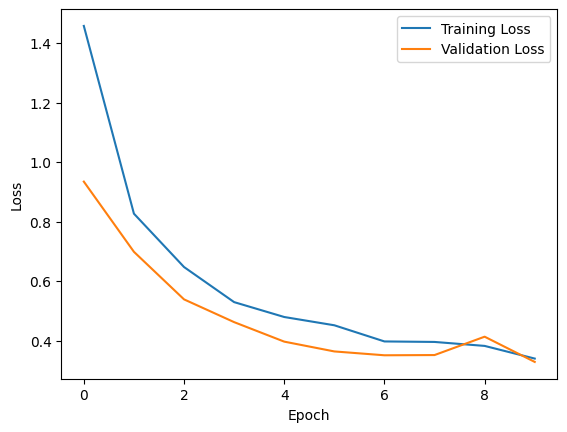

In [ ]:
# DONT RUN IT!!!
# ---------------------

# Plot accuracy and loss curves
'''
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
'''

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

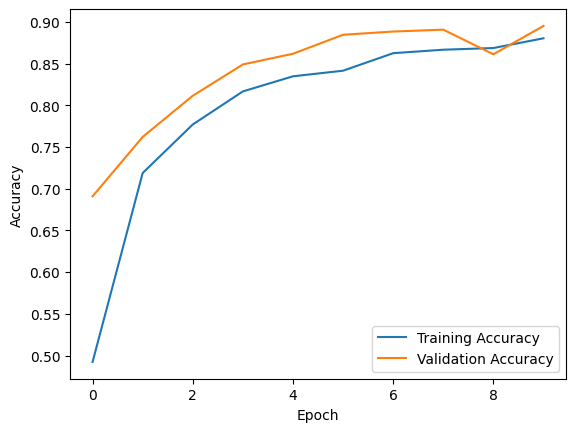

In [ ]:
# DONT RUN IT!!!
# ---------------------

'''
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
'''

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Saving the CNN Model**

In [ ]:
# Run This
from tensorflow.keras.models import load_model

In [ ]:
# DONT RUN THIS!!!
# model.save("/content/drive/MyDrive/final_tomato.h5")

In [ ]:
# Run This
load_mod=load_model("/content/drive/MyDrive/final_tomato.h5")
load_mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 113, 113, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 96800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
# Run This
train_set.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
# Run This
ref=dict(zip(list(train_set.class_indices.values()), list(train_set.class_indices.keys())))
ref=list(ref.values())

1/1 [==============================] - 7s 7s/step
Predicted class: Tomato___Septoria_leaf_spot


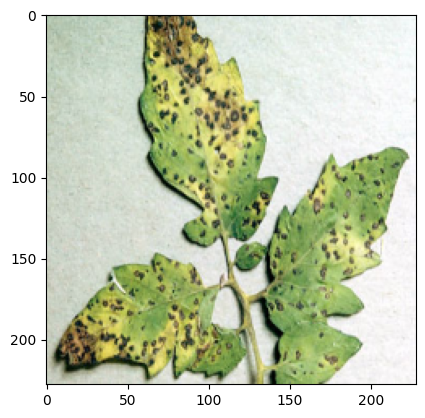

In [ ]:
# Run This
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import keras.utils as image
import cv2
from google.colab.patches import cv2_imshow

# Define the path to the trained model
model_path = "/content/drive/MyDrive/final_tomato.h5"

# Define the path to the input image
image_path = "/content/drive/MyDrive/testing/7-16-septoria-leafspot1-GRETCHEN.jpg"

# Load the trained model
model = load_model(model_path)

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(228, 228))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction and get the class with the highest probability
predictions = model.predict(x)
class_idx = np.argmax(predictions, axis=1)
class_names = ref
class_name = class_names[class_idx[0]]

# Print the predicted class
print('Predicted class:', class_name)
# cv2_imshow(image_path)

temp = cv2.imread(image_path)
img=cv2.resize(temp,(228,228))
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 99ms/step
Predicted class: Tomato___healthy


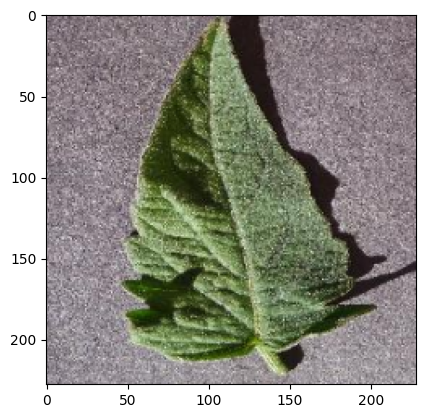

In [ ]:
# Run This
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
import keras.utils as image
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Define the path to the trained model
model_path = "/content/drive/MyDrive/final_tomato.h5"

# Define the path to the input image
image_path = "/content/drive/MyDrive/testing/healty.png"

# Load the trained model
model = load_model(model_path)

# Load and preprocess the input image
img = image.load_img(image_path, target_size=(228, 228))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Make the prediction and get the class with the highest probability
predictions = model.predict(x)
class_idx = np.argmax(predictions, axis=1)
class_names = ref
class_name = class_names[class_idx[0]]

# Print the predicted class
print('Predicted class:', class_name)



temp = cv2.imread(image_path)
img=cv2.resize(temp,(228,228))
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
# Run This
x=int(class_idx)
print(x)

9


In [ ]:
# Run This
if x == 6:
  print("Target Spot")
  print("(A) Prevention:- To manage target spot on tomatoes, regular application of fungicides is preferred.")
  print("(B) Precaution:- Inspect the seedlings for target spot symptoms before transplanting. Manage weeds, which may serve as alternate hosts, and avoid the use of overhead irrigation as a precaution.")


elif x == 3:
  print("Leaf mold")
  print("(A) Prevention:- Maintain adequate spacing between plants and keep them far enough away from walls and fences to ensure good air circulation and help reduce relative humidity.")
  print("(B) Precaution:- Applying fungicides when symptoms first appear can reduce the spread of the leaf mold fungus significantly.")

elif x == 8:
  print("Mosaic virus")
  print("(A) Prevention:- Avoid handling plants (plant seed rather than transplants), remove diseased plants, control weeds and rotate crops, and avoid planting near virus-infected plants.")
  print("(B) Precaution:- Use certified virus-free seeds when planting to reduce the risk of mosaic virus infections.")

elif x == 2:
  print("Late blight")
  print("(A) Prevention:- Spraying fungicides is the most effective way to prevent late blight.")
  print("(B) Precaution:- Removing any volunteer tomato and potato plants, and any wild nightshades, from the garden")


elif x == 4:
  print("Septoria leaf spot")
  print("(A) Prevention:- Eliminate the initial source of infection by removing infected plant debris and weeds.")
  print("(B) Precaution:- Avoid overhead watering or to water early in the day so that the leaves dry more quickly than with nighttime watering.")

elif x == 7:
  print("Yellow Leaf Curl Virus")
  print("(A) Prevention:- Intercrop with rows of non-susceptible plants such as squash and cucumber.")
  print("(B) Precaution:- Plant early to avoid peak populations of the whitefly")

elif x == 1:
  print("Early blight")
  print("(A) Prevention:- Maintaining optimum growing conditions, including proper fertilization, irrigation, and management of other pests.")
  print("(B) Precaution:- Proper fertilization, irrigation, and management of other pests.")

elif x == 0:
  print("Bacterial spot")
  print("(A) Prevention:- Avoid handling plants when they are wet")
  print("(B) Precaution:- Use pathogen-free seed as the first step in disease management.")  

elif x==5:
  print("Two-spotted spider mite")
  print("(A) Prevention:- Keep production areas free of weeds")
  print("(B) Precaution:- Water plants thoroughly before spraying pesticides for spider mites.")
  
else:
  print("Your Plant is healthy")

Your Plant is healthy
